<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project by SAHAN</b></p>

<p style="background-color:orange;font-family:calibri;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b> Polynomial Regression </b></p>

this notebook has been created to better understand the overfitting-underfitting issues


Types of polinomials
   
1st degree ---> linear    b1x + b0   ---> 
2nd degree ---> Quadratic b2x^2 + b1x + b0   --->  

3rd degree ---> Cubic     b3x^3 + b2x^2 + b1x + b0  --> 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Let's simply evaluate the sample data set
data = np.array([[2,3,4]])
print(data)

[[2 3 4]]


In [4]:
trans = PolynomialFeatures(degree=2, include_bias=False)  # I will add 2nd order Polynomial features to the data

In [5]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [6]:
trans.transform(data)     # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2 In this way, he turned it to the 2nd degree and completed the transform process.

# X1 ** 2 + X2 ** 2 + X3 ** 2 + X1X2 + X1X3 + X2X3 + X1 + X2 + X3 

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [7]:
# we use the following code to do both transform and fit at the same time

trans.fit_transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [8]:
# degree = 3, if there was;
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

## Read Dataset

In [9]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
# Now let's use the Polynomial Features function to increase the number of features of our data set in a mathematical way



## Polynomial Converter

In [11]:
X = df.drop("sales", axis=1)
y = df.sales

In [12]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)  

In [13]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [14]:
poly_features = poly_conv.transform(X)   # we produced polymomial features

In [15]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [16]:
poly_features.shape    # the number of lines remained 200, the feature was increased from 3 to 9

(200, 9)

In [17]:
pd.DataFrame(poly_features, columns=["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&radio,TV&newspaper,radio^2,radio&newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [18]:
X.shape   # Let's remember the first version

(200, 3)

# Train | Test Split

In [19]:
from sklearn.model_selection  import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# We preferred the data set with 9 features by taking poly_features instead of X

## Model fitting

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_poly = LinearRegression()

In [23]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model_poly.predict(X_test)

In [25]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


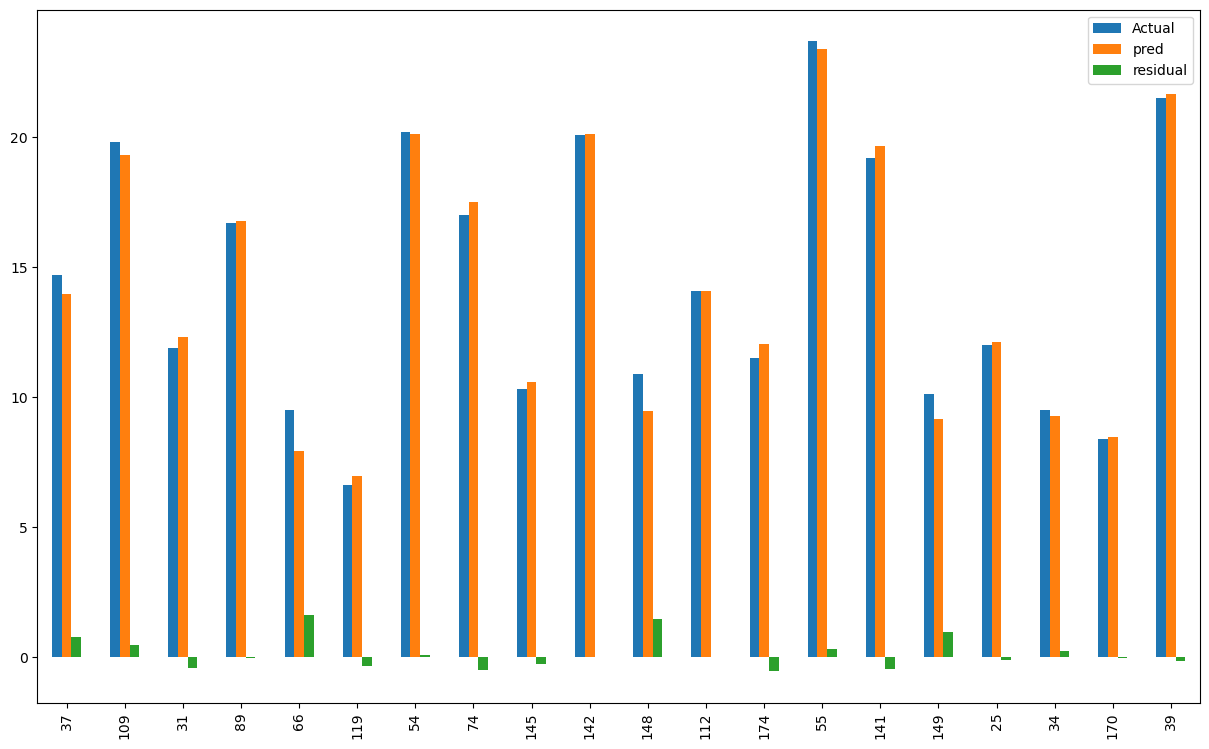

In [26]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

## Polynomial Coefficients -

In [27]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [28]:
# Let's turn the coefs into Df and match them with the previous features'

df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&radio", \
                                    "TV&newspaper", "radio^2", "radio&newspaper", "newspaper^2"], columns = ["coef"])

In [29]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&radio,0.001142
TV&newspaper,-0.000052
radio^2,0.000033
radio&newspaper,0.000146
newspaper^2,-0.000030


In [30]:
# Let's put the first line manually in the prediction line...the bottom picture shows the first line values

model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]]) 

array([21.86190699])

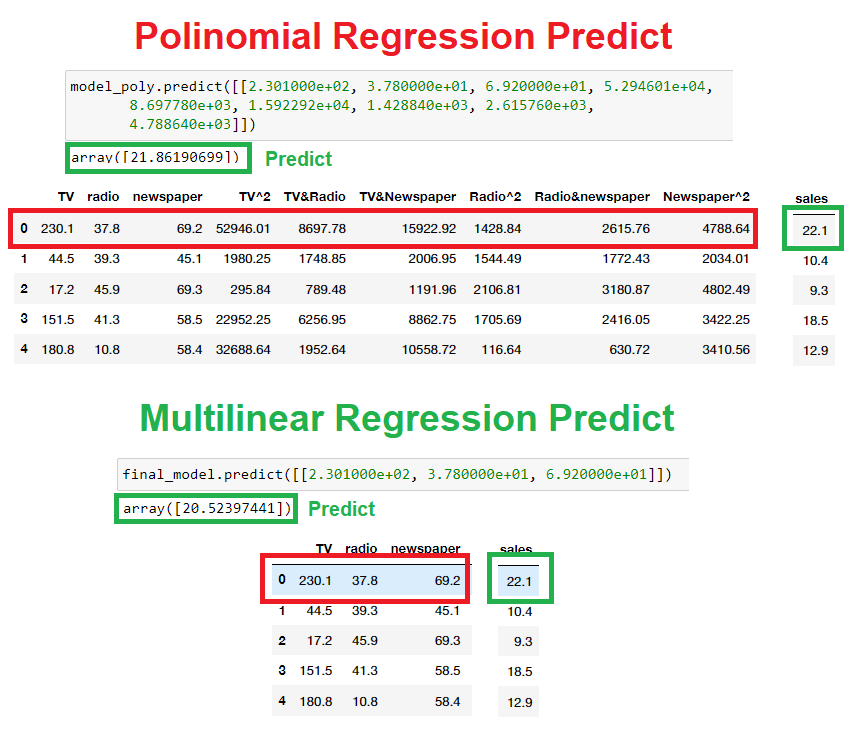

## Evaluation on the Test Set

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
y_pred = model_poly.predict(X_test)   

In [33]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [34]:
eval_metric(y_test, y_pred)  # Values of the test section

Model testing performance:
--------------------------
R2_score 	: 0.9843529333146789
MAE 		: 0.48967980448037096
MSE 		: 0.44175055104035904
RMSE 		: 0.6646431757269152


In [35]:
y_train_pred = model_poly.predict(X_train)

In [36]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.40492481391515467
MSE 		: 0.3456939142443998
RMSE 		: 0.5879574085292232


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609
    

* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

# Find an Optimum Polynomial Degree

In [37]:
# According to the RMSE value, we will decide the optimum grade

In [38]:
def poly(d):   # degree will create a solution according to what I write into the degree
    
    train_rmse_errors = []   # trains rmse will collect values
    test_rmse_errors = []    # test rmse will collect values
    number_of_features = []  # we'll see how the number of features increases with increasing degrees.
    
    for i in range(1, d):  # From 1 to how many degrees we want, we will write accordingly
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [39]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,1.734594,1.516152,3
2,0.587957,0.664643,9
3,0.433934,0.580329,19
4,0.351708,0.507774,34
5,0.250934,2.575825,55
6,0.199407,4.490840,83
7,5.421422,1381.404418,119
8,0.141952,4449.598881,164
9,0.166528,95891.239706,219


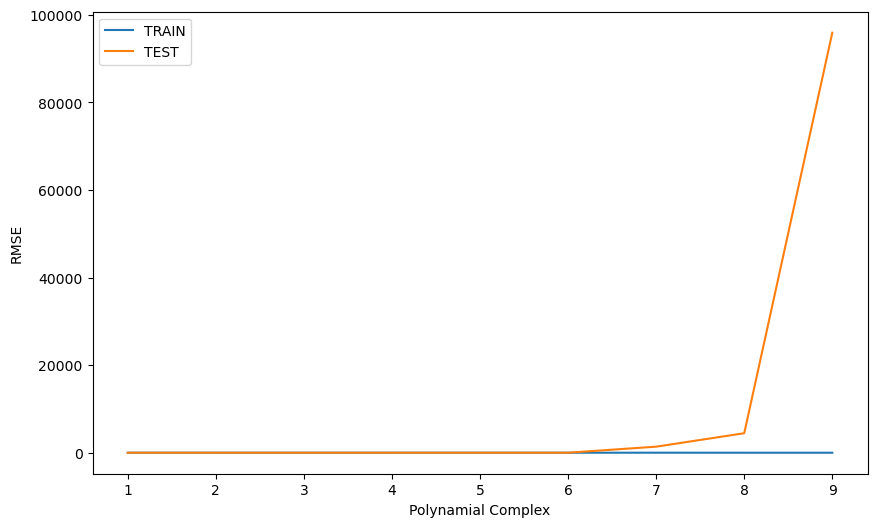

In [40]:
# Let's draw a graph of the above results and see the explosion point

plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

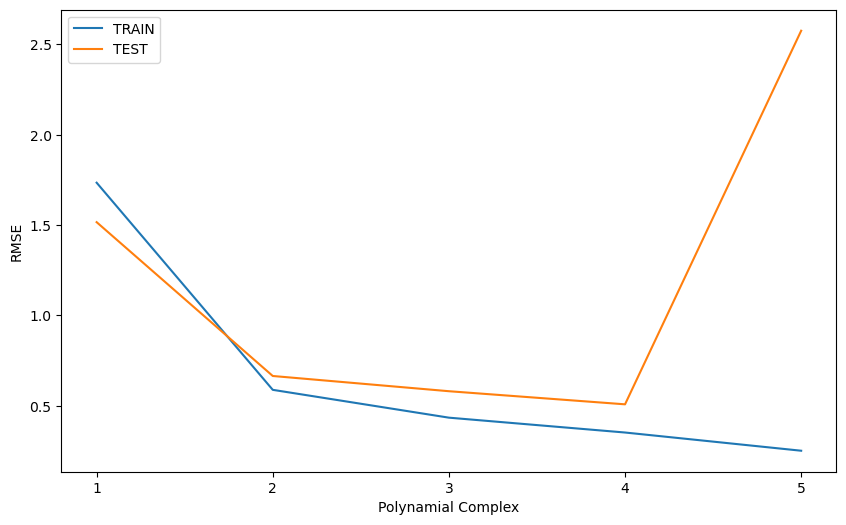

In [41]:
# let's take a closer look at the graph

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.xticks(range(1, 6, 1))
plt.show()

In [42]:
 
# it would be more reliable to stay at a value to the left of the explosion point.
# Therefore, the 3rd degree can be taken as the optimum value

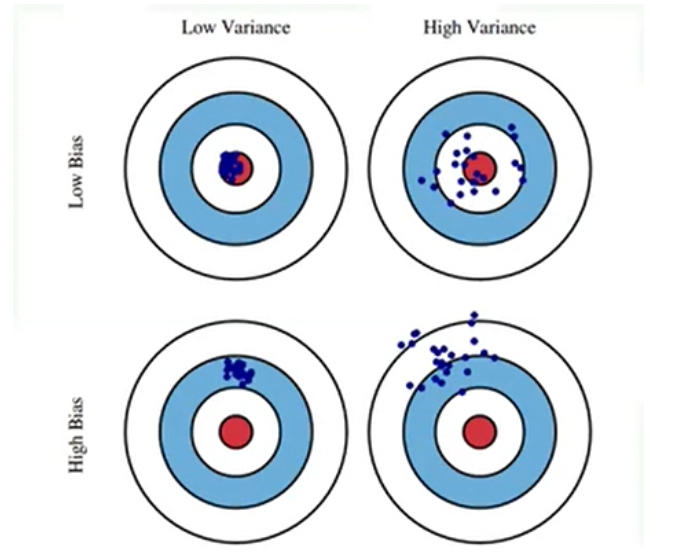

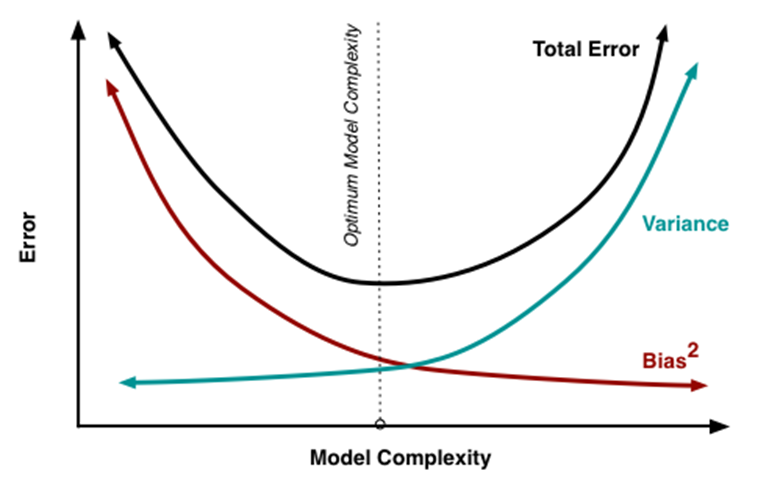

# Finalize the model

In [43]:
# Let's continue by accepting that the optimum degree is 3rd degree, let's build the final model with this information
# we want to get better results by training the model with all the data. Train-test part no longer exists

final_poly_conv = PolynomialFeatures(degree=3, include_bias=False)

# We'll train our model with the 3rd degree...we'll train...

In [44]:
final_model = LinearRegression()

In [45]:
final_model.fit(final_poly_conv.fit_transform(X), y)

# I fit my model, I use Polymomial Feature instead of X and generate feature for 3rd order.
# I take the final_poly_conv variable and fit all the data with (X)

LinearRegression()

## Prediction

In [46]:
new_record = [[150,20,15]]   # When making prediction, we give as much as the number of features at the beginning

In [47]:
new_record_poly = final_poly_conv.fit_transform(new_record)   # to a polynomial feature.

In [48]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [49]:
final_model.predict(new_record_poly)  # we predicted the new state with final_model information

array([14.24950844])

# Overfitting Application Trial

In [50]:
 

# Let's produce a feature based on the 5th degree, which is the point where overfitting starts in the graph above (where train and test diverge)
# let's watch the formation of overfitting

In [51]:
over_poly_converter = PolynomialFeatures(degree=5, include_bias=False)

# 5.dereceden polinom özelliği üretiyoruz

In [52]:
over_model =LinearRegression()   

In [53]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [54]:
over_model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred_over = over_model.predict(X_test)

In [56]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score 	: 0.7649888518703625
MAE 		: 0.6659574891491746
MSE 		: 6.634873249711867
RMSE 		: 2.5758247707699113


In [57]:
# Let's look at the train scores
y_train_over = over_model.predict(X_train)

In [58]:
eval_metric(y_train, y_train_over)

Model testing performance:
--------------------------
R2_score 	: 0.9976072484653282
MAE 		: 0.18621400407821548
MSE 		: 0.06296802050706767
RMSE 		: 0.2509342951990972


In [59]:
# There is a significant difference between the train R2 of 0.99 and the test R2 of 0.76. This difference showed us overfitting
# overfitting was diagnosed because the scores of the train set were very good but the scores of the test set were bad

## Underfitting

The scores below are the scores we got for degree=1. According to Degree=3, the trainnig part performed poorly in the lower scores